In [100]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [8]:
file_to_load = "Resources/hotel_bookings.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [9]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
len(purchase_data)

119390

## DATA CLEANING

In [20]:
#Checking missing values
purchase_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
#Country, agent, and company have missing values. Fill data with 0s. 
clean_purchase_data = purchase_data.fillna(value=0)

119390

# Pregunta 1

### What country do guests come from?


## PLOT 1

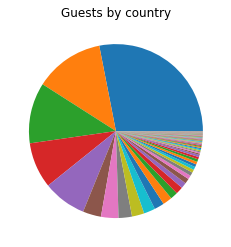

In [49]:
#Guests by country 
countries = clean_purchase_data["country"].loc[clean_purchase_data["is_canceled"]==0].value_counts()
countries_percentage = round(countries/countries.sum()*100,2)
fig = plt.pie(countries_percentage)
plt.title("Guests by country")
plt.show()

# Pregunta 2

### What is the average price per room?

## PLOT 2

In [88]:
#Hay un error que no he podido resolver cuando trata de graficar los subplots
room_purchase_data = clean_purchase_data.loc[clean_purchase_data["is_canceled"]==0]
room_prices = room_purchase_data[["hotel","reserved_room_type","adr"]].sort_values("reserved_room_type")
room_prices = room_prices.dropna()
#fig1, ax1 = plt.subplots()
#ax1.boxplot(room_prices)
#plt.show()
room_prices

,hotel,reserved_room_type,adr
80541,City Hotel,A,68.85
90111,City Hotel,A,111.35
90112,City Hotel,A,99.66
90114,City Hotel,A,128.00
90115,City Hotel,A,129.00
...,...,...,...
26937,Resort Hotel,H,322.00
14570,Resort Hotel,L,82.00
15855,Resort Hotel,L,172.00
911,Resort Hotel,L,200.00


# Pregunta 3

### Reservations per month by Hotel Type?

## PLOT 3

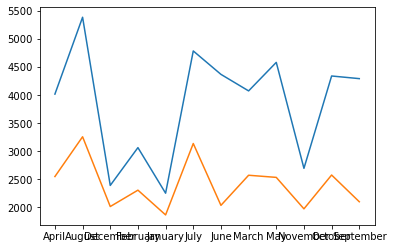

In [122]:
city_hotel = clean_purchase_data.loc[clean_purchase_data["hotel"]=="City Hotel"].loc[clean_purchase_data["is_canceled"]==0]
resort_hotel = clean_purchase_data.loc[clean_purchase_data["hotel"]=="Resort Hotel"].loc[clean_purchase_data["is_canceled"]==0]
city_hotel_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()
resort_hotel_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()

## LO SIGUIENTE ERA PARA TRATAR DE REORDENAR LA LISTA PERO NO PUDE, SI ME PUDIERAN AYUDAR A ARREGLARLO O CAMBIARLO PARA QUE SE REORDENE JAN-DEC
#ordered_months = pd.DataFrame({"months":["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]})
#sort_ordered_months = ordered_months.reset_index().set_index("months")
#city_hotel_monthly["months_number"] = city_hotel_monthly.map(sort_ordered_months["index"])
#sort_ordered_months

plt.plot(city_hotel_monthly)
plt.plot(resort_hotel_monthly)
plt.show()

# Pregunta 4

### How long do people stay at the hotels

## Plot 4

In [124]:
city_total_nights = city_hotel["stays_in_weekend_nights"] + city_hotel["stays_in_week_nights"]
resort_total_nights = resort_hotel["stays_in_weekend_nights"] + resort_hotel["stays_in_week_nights"]


40060     2
40066     3
40070     2
40071     2
40072     2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Length: 46228, dtype: int64